In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(3,2))

# Ladd

## L – partícula lejos del muro

(np.float64(0.0), np.float64(201.0), np.float64(0.0), np.float64(201.0))

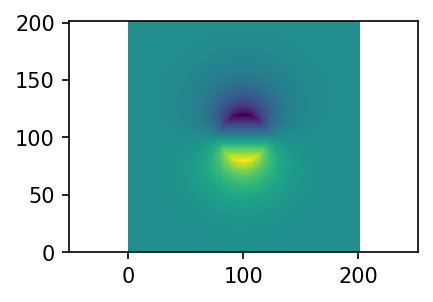

In [2]:
# se espera que este nb esté en src/
ladd_pL_space = pd.read_csv("../data.lbm/ladd/movingParticle/L/fluidTrj_2991.csv").set_index(["id_x","id_y"]).sort_index()

plt.pcolor(ladd_pL_space.fluidVelocity_x.unstack().values.transpose())
plt.axis("equal")

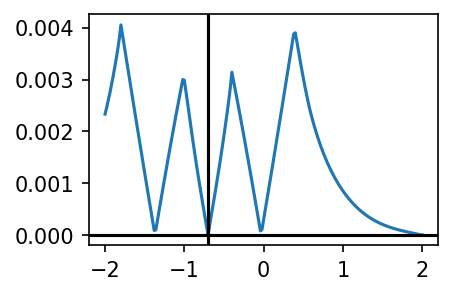

In [3]:
ladd_vL_x = ladd_pL_space.loc[101].filter(["coordinate_y", "fluidVelocity_x"])

wallPosition = -0.7

ladd_vL_x_disp = ladd_vL_x.copy()
ladd_vL_x_disp.coordinate_y = ladd_vL_x_disp.coordinate_y + 2*wallPosition

ladd_vL_sum = ladd_vL_x_disp.set_index("coordinate_y").reindex(
    ladd_vL_x.set_index("coordinate_y").index, method="nearest") + ladd_vL_x.set_index("coordinate_y") 

plt.plot(np.abs(ladd_vL_sum)) 
plt.axvline(wallPosition, color = "k")
plt.axhline(0, color = "k")

## R – partícula cerca del muro, moviéndose

(np.float64(0.0), np.float64(201.0), np.float64(0.0), np.float64(201.0))

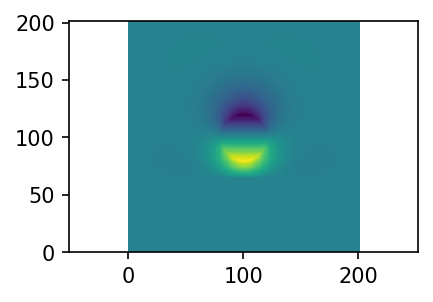

In [4]:
ladd_pR_space = pd.read_csv("../data.lbm/ladd/movingParticle/R/fluidTrj_2991.csv").set_index(["id_x", "id_y"]).sort_index()

plt.pcolor(ladd_pR_space.fluidVelocity_x.unstack().values.transpose())
plt.axis("equal")

In [5]:
# posición de la partícula en el último tick
ladd_particleDf = pd.read_csv("../data.lbm/ladd/movingParticle/R/particlesTrj.csv")
ladd_particleDf = ladd_particleDf[ladd_particleDf['tick']==2991]
ladd_particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
300,2991,59.82,1,0.014448,-0.000265,0.000406,0.000006,0.01


In [6]:
# encuentro id_x de la partícula en el último tick
x = ladd_particleDf.position_x.values[0]
step = ladd_pR_space.loc[2].coordinate_x.values[0] - ladd_pR_space.loc[1].coordinate_x.values[0]
ladd_pR_space[(x - step <= ladd_pR_space['coordinate_x']) & (ladd_pR_space["coordinate_x"] <= x + step)]

tick   time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                         
101  1     2991  59.82          0.00         -2.00          0.0   
     2     2991  59.82          0.00         -1.98          0.0   
     3     2991  59.82          0.00         -1.96          0.0   
     4     2991  59.82          0.00         -1.94          0.0   
     5     2991  59.82          0.00         -1.92          0.0   
...         ...    ...           ...           ...          ...   
102  197   2991  59.82          0.02          1.92          1.0   
     198   2991  59.82          0.02          1.94          1.0   
     199   2991  59.82          0.02          1.96          1.0   
     200   2991  59.82          0.02          1.98          1.0   
     201   2991  59.82          0.02          2.00          0.0   

           fluidVelocity_x  fluidVelocity_y        f1        f2        f3  \
id_x id_y                                                                   
101  1            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     2            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     3            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     4            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     5            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
...                    ...              ...       ...       ...       ...   
102  197          0.000024    -1.324658e-07  0.444444  0.111119  0.111103   
     198          0.000018    -1.916359e-07  0.444444  0.111117  0.111105   
     199          0.000011    -2.914661e-08  0.444444  0.111115  0.111107   
     200          0.000004    -8.355253e-08  0.444444  0.111112  0.111110   
     201          0.000000     0.000000e+00  0.000000  0.000000  0.000000   

                 f4        f5        f6        f7        f8        f9  
id_x id_y                                                              
101  1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...             ...       ...       ...       ...       ...       ...  
102  197   0.111111  0.111111  0.027780  0.027775  0.027779  0.027776  
     198   0.111111  0.111111  0.027780  0.027776  0.027779  0.027777  
     199   0.111111  0.111111  0.027779  0.027776  0.027778  0.027778  
     200   0.111111  0.111111  0.027779  0.027777  0.027777  0.027778  
     201   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[402 rows x 16 columns]

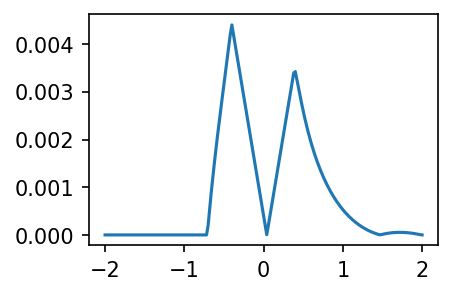

In [7]:
# elegí id_x buscando el coordinate_x que más se acerque a la posición de la partícula
ladd_vR_x = ladd_pR_space.loc[102].filter(["coordinate_y", "fluidVelocity_x"])
ladd_vR_x.head()


plt.plot(ladd_vR_x.coordinate_y, np.abs(ladd_vR_x.fluidVelocity_x))

## Comparación

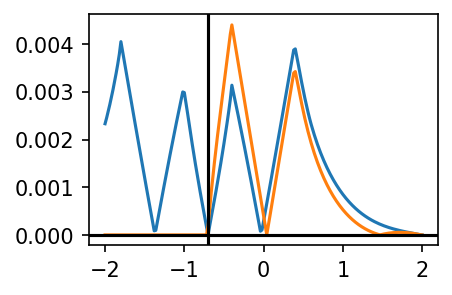

In [8]:
plt.plot(np.abs(ladd_vL_sum)) 
plt.plot(ladd_vR_x.coordinate_y, np.abs(ladd_vR_x.fluidVelocity_x))
plt.axvline(wallPosition, color = "k")
plt.axhline(0, color = "k")

# PSM

## L – partícula lejos del muro

(np.float64(0.0), np.float64(201.0), np.float64(0.0), np.float64(201.0))

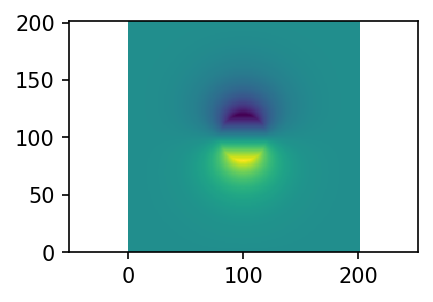

In [9]:
# se espera que este nb esté en src/
psm_pL_space = pd.read_csv("../data.lbm/psm/movingParticle/L/fluidTrj_2991.csv").set_index(["id_x","id_y"]).sort_index()

plt.pcolor(psm_pL_space.fluidVelocity_x.unstack().values.transpose())
plt.axis("equal")

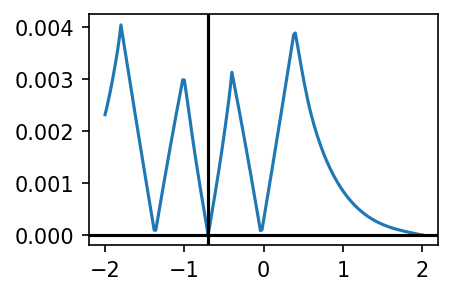

In [10]:
psm_vL_x = psm_pL_space.loc[101].filter(["coordinate_y", "fluidVelocity_x"])

wallPosition = -0.7

psm_vL_x_disp = psm_vL_x.copy()
psm_vL_x_disp.coordinate_y = psm_vL_x_disp.coordinate_y + 2*wallPosition

psm_vL_sum = psm_vL_x_disp.set_index("coordinate_y").reindex(
    psm_vL_x.set_index("coordinate_y").index, method="nearest") + psm_vL_x.set_index("coordinate_y") 

plt.plot(np.abs(psm_vL_sum)) 
plt.axvline(wallPosition, color = "k")
plt.axhline(0, color = "k")

## R – partícula cerca del muro, moviéndose

(np.float64(0.0), np.float64(201.0), np.float64(0.0), np.float64(201.0))

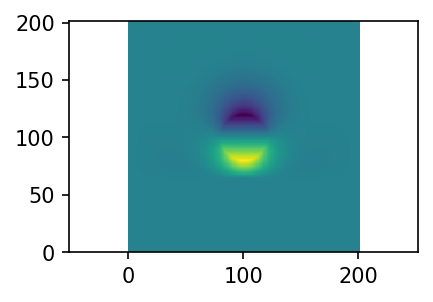

In [11]:
psm_pR_space = pd.read_csv("../data.lbm/psm/movingParticle/R/fluidTrj_2991.csv").set_index(["id_x", "id_y"]).sort_index()

plt.pcolor(psm_pR_space.fluidVelocity_x.unstack().values.transpose())
plt.axis("equal")

In [12]:
# posición de la partícula en el último tick
psm_particleDf = pd.read_csv("../data.lbm/psm/movingParticle/R/particlesTrj.csv")
psm_particleDf = psm_particleDf[psm_particleDf['tick']==2991]
psm_particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
300,2991,59.82,1,0.014313,-0.000392,0.000403,0.000006,0.01


In [13]:
# encuentro id_x de la partícula en el último tick
x = psm_particleDf.position_x.values[0]
step = psm_pR_space.loc[2].coordinate_x.values[0] - psm_pR_space.loc[1].coordinate_x.values[0]
psm_pR_space[(x - step <= psm_pR_space['coordinate_x']) & (psm_pR_space["coordinate_x"] <= x + step)]

tick   time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                         
101  1     2991  59.82          0.00         -2.00     0.000000   
     2     2991  59.82          0.00         -1.98     0.000000   
     3     2991  59.82          0.00         -1.96     0.000000   
     4     2991  59.82          0.00         -1.94     0.000000   
     5     2991  59.82          0.00         -1.92     0.000000   
...         ...    ...           ...           ...          ...   
102  197   2991  59.82          0.02          1.92     1.000009   
     198   2991  59.82          0.02          1.94     1.000009   
     199   2991  59.82          0.02          1.96     1.000009   
     200   2991  59.82          0.02          1.98     1.000009   
     201   2991  59.82          0.02          2.00     0.000000   

           fluidVelocity_x  fluidVelocity_y        f1        f2        f3  \
id_x id_y                                                                   
101  1            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     2            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     3            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     4            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
     5            0.000000     0.000000e+00  0.000000  0.000000  0.000000   
...                    ...              ...       ...       ...       ...   
102  197          0.000023    -2.059420e-07  0.444449  0.111120  0.111104   
     198          0.000017    -1.432608e-07  0.444449  0.111118  0.111106   
     199          0.000011    -9.269442e-08  0.444449  0.111116  0.111109   
     200          0.000004    -2.559456e-08  0.444449  0.111113  0.111111   
     201          0.000000     0.000000e+00  0.000000  0.000000  0.000000   

                 f4        f5        f6        f7        f8        f9  
id_x id_y                                                              
101  1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
     5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...             ...       ...       ...       ...       ...       ...  
102  197   0.111112  0.111112  0.027780  0.027776  0.027779  0.027777  
     198   0.111112  0.111112  0.027780  0.027776  0.027779  0.027777  
     199   0.111112  0.111112  0.027780  0.027777  0.027778  0.027778  
     200   0.111112  0.111112  0.027779  0.027777  0.027778  0.027778  
     201   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[402 rows x 16 columns]

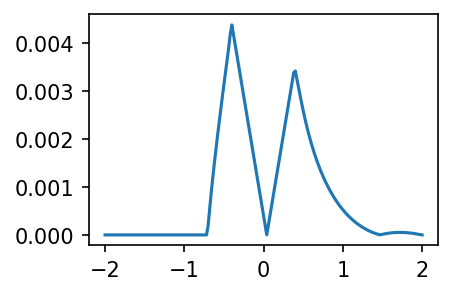

In [14]:
# elegí id_x buscando el coordinate_x que más se acerque a la posición de la partícula
psm_vR_x = psm_pR_space.loc[102].filter(["coordinate_y", "fluidVelocity_x"])
psm_vR_x.head()


plt.plot(psm_vR_x.coordinate_y, np.abs(psm_vR_x.fluidVelocity_x))

## Comparación

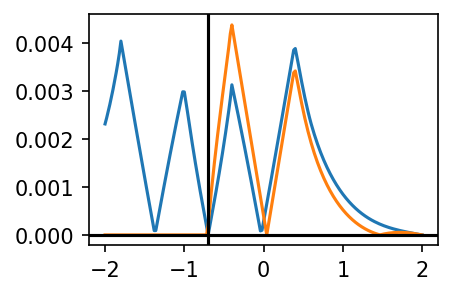

In [15]:
plt.plot(np.abs(psm_vL_sum)) 
plt.plot(psm_vR_x.coordinate_y, np.abs(psm_vR_x.fluidVelocity_x))
plt.axvline(wallPosition, color = "k")
plt.axhline(0, color = "k")

# Ladd vs PSM

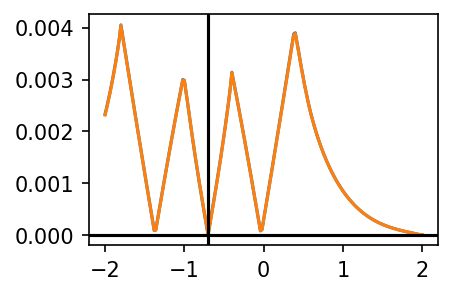

In [16]:
plt.plot(np.abs(ladd_vL_sum)) 
plt.plot(np.abs(psm_vL_sum)) 
plt.axvline(wallPosition, color = "k")
plt.axhline(0, color = "k")

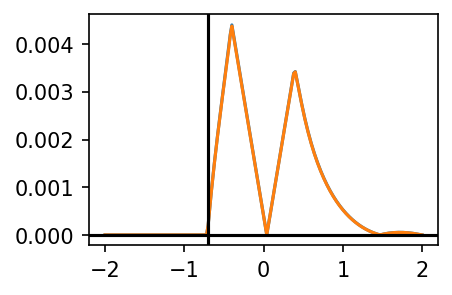

In [17]:
plt.plot(ladd_vR_x.coordinate_y, np.abs(ladd_vR_x.fluidVelocity_x))
plt.plot(psm_vR_x.coordinate_y, np.abs(psm_vR_x.fluidVelocity_x))
plt.axvline(wallPosition, color = "k")
plt.axhline(0, color = "k")